In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [198]:
datatest = pd.read_csv('asset-v1_IRONHACK+DAFT+202007_SAO+type@asset+block@diamonds.csv')

In [199]:
datatest.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [200]:


def classify_diamond(clarity):
    dict_classify = {'IF' : 7, 'VVS1' : 6, 'VVS2' : 5, 'VS1' : 4, 'VS2': 3, 'SI1':2,  'SI2' : 1, 'I1' : 0}
    return dict_classify[clarity]

datatest['clarity'] = datatest['clarity'].map(lambda x: classify_diamond(x))



def classify_color(color):
    dict_color = {'D' : 6, 'E' : 5, 'F' : 4, 'G' : 3, 'H': 2, 'I':1,  'J' : 0}
    return dict_color[color]

datatest['color'] = datatest['color'].map(lambda x: classify_color(x))

def classify_cut(cut):
    dict_color = {'Ideal' : 4, 'Premium' : 3, 'Very Good' : 2, 'Good' : 1, 'Fair': 0}
    return dict_color[cut]

datatest['cut'] = datatest['cut'].map(lambda x: classify_cut(x))





In [201]:
datatest.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
1,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
2,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
3,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
4,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48


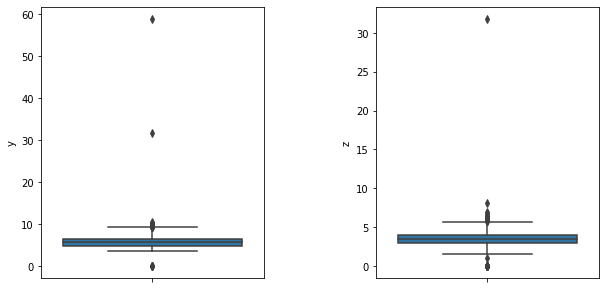

In [202]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=datatest.y, ax=ax[0])
sns.boxplot(y=datatest.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)


fig.savefig("box1.png")

In [203]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  int64  
 2   color    48940 non-null  int64  
 3   clarity  48940 non-null  int64  
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 3.7 MB


In [204]:
datatest.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,2.906416,3.407254,3.055456,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.116568,1.699858,1.645542,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [205]:
datatest.shape

(48940, 10)

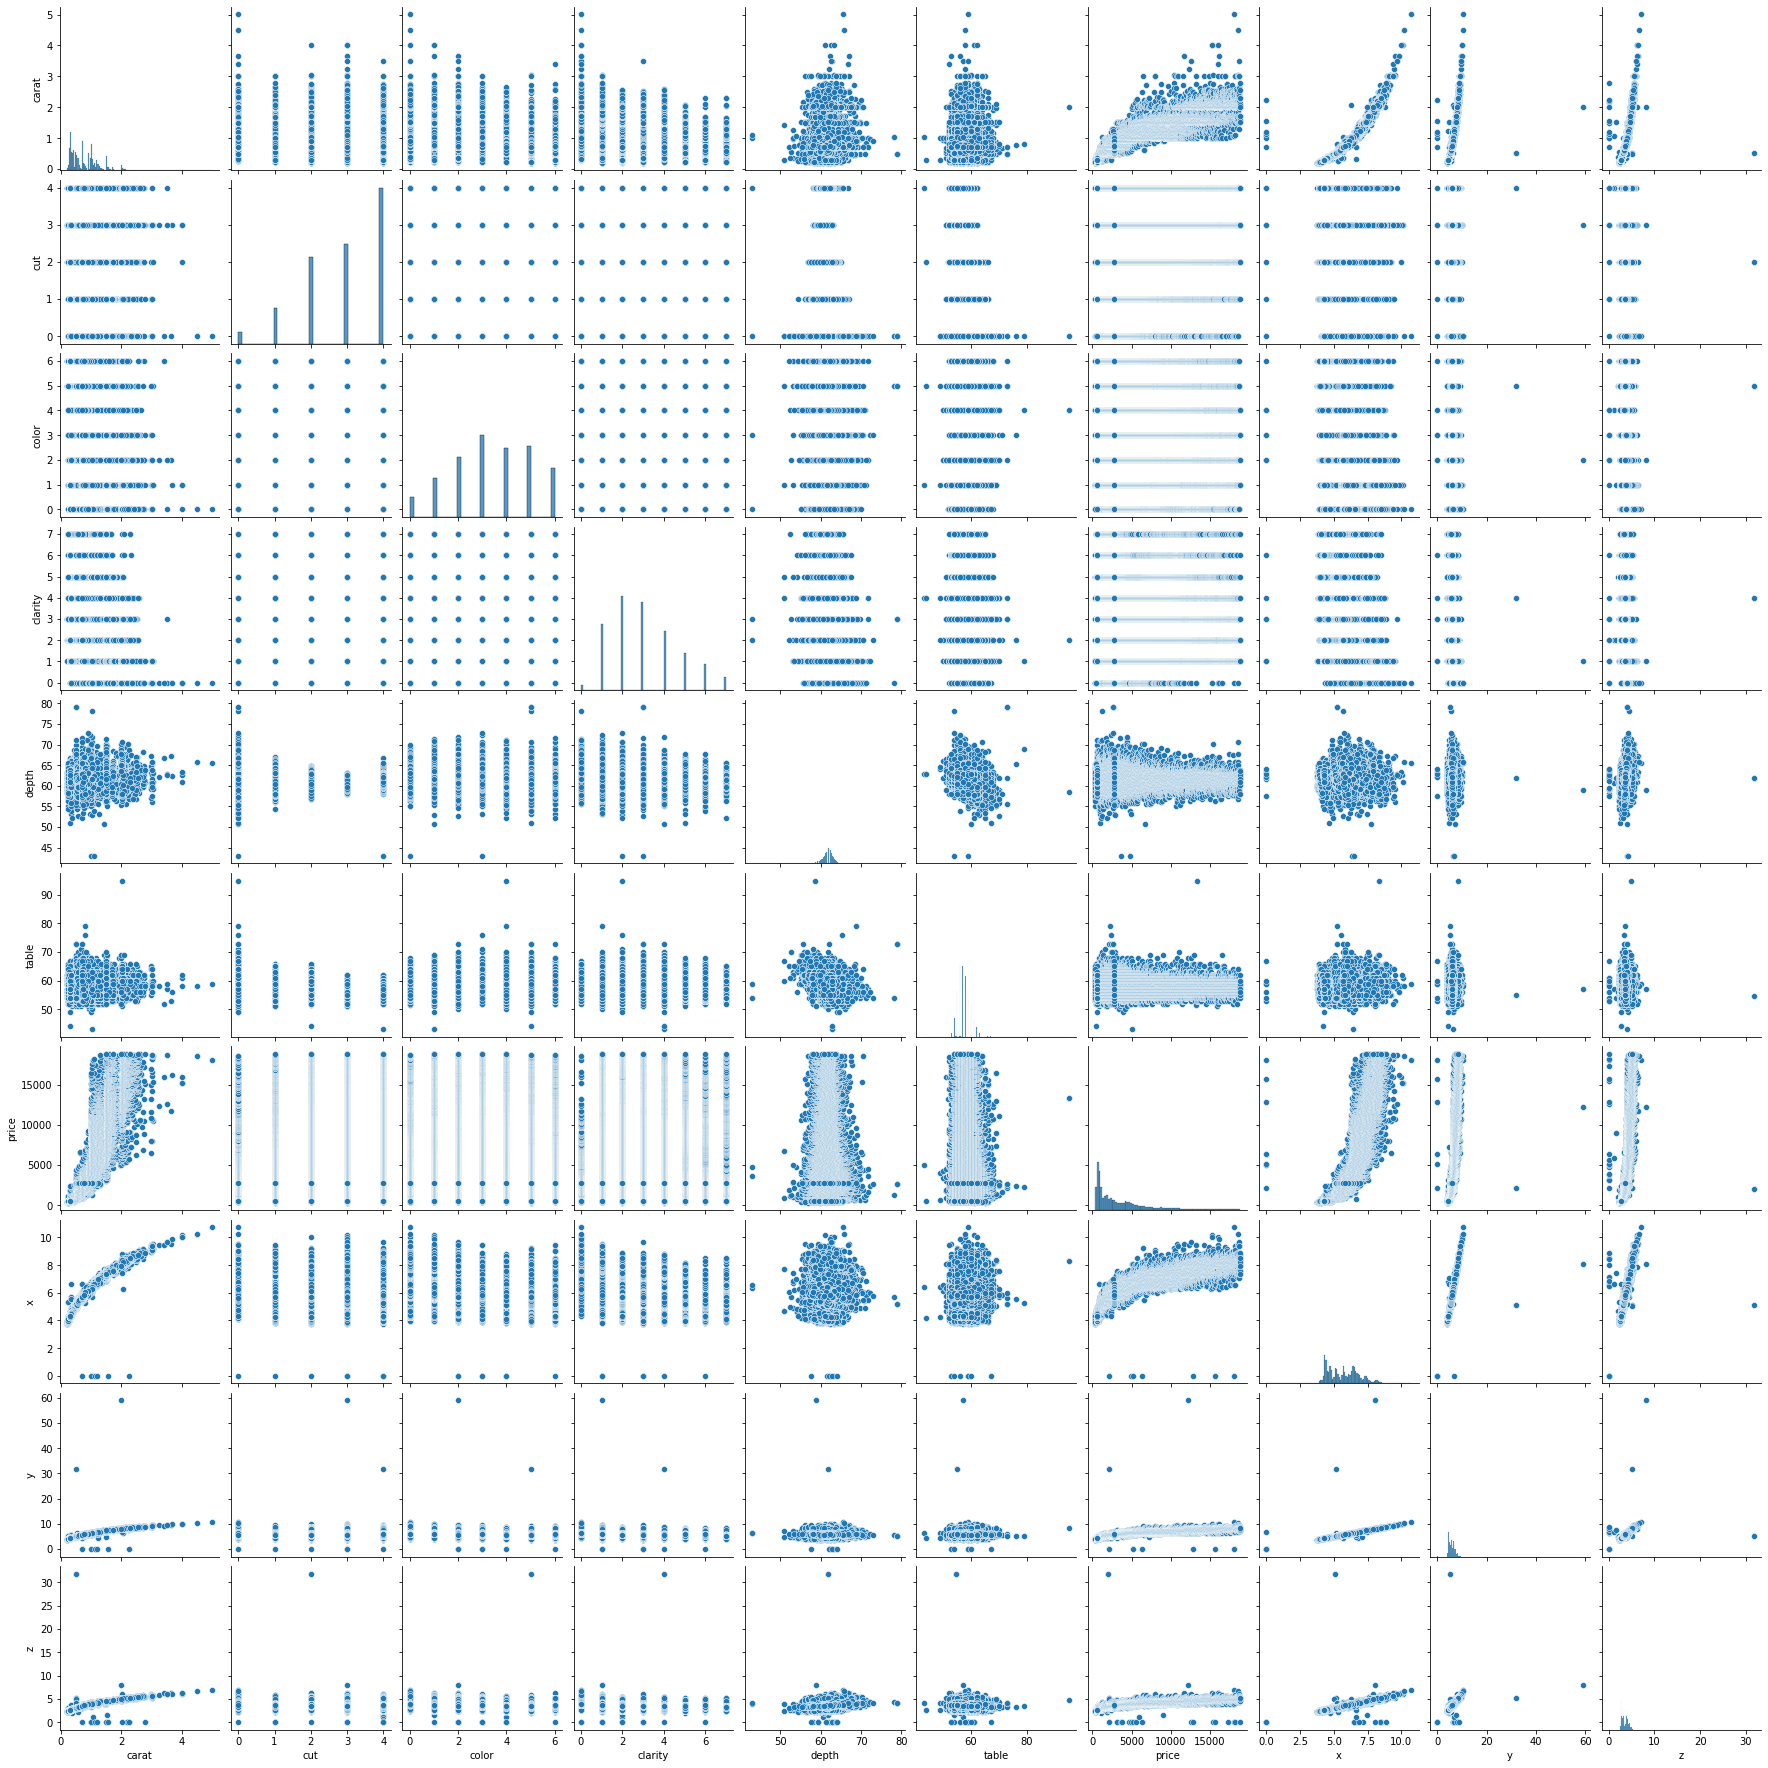

In [206]:
fpair = sns.pairplot(data=datatest)
fig = fpair.fig
fig.savefig("fpair.png")

In [207]:
datatest = datatest[datatest['x']<= 10]
datatest = datatest[datatest['y']<= 10]
datatest = datatest[datatest['z']<= 10]
datatest = datatest[datatest['x']> 0]
datatest = datatest[datatest['y']> 0]
datatest = datatest[datatest['z']> 0]

datatest['volume'] = (datatest['x'] * datatest['y'] * datatest['z']) 

In [208]:
datatest.shape

(48914, 11)

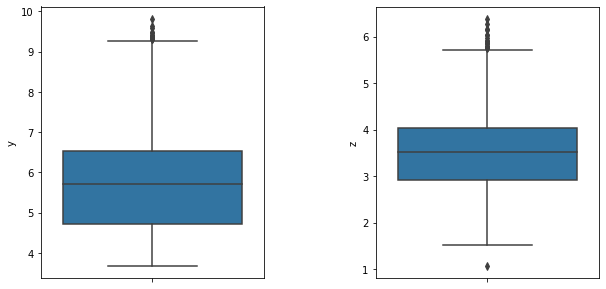

In [209]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=datatest.y, ax=ax[0])
sns.boxplot(y=datatest.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

fig.savefig("box_2.png")

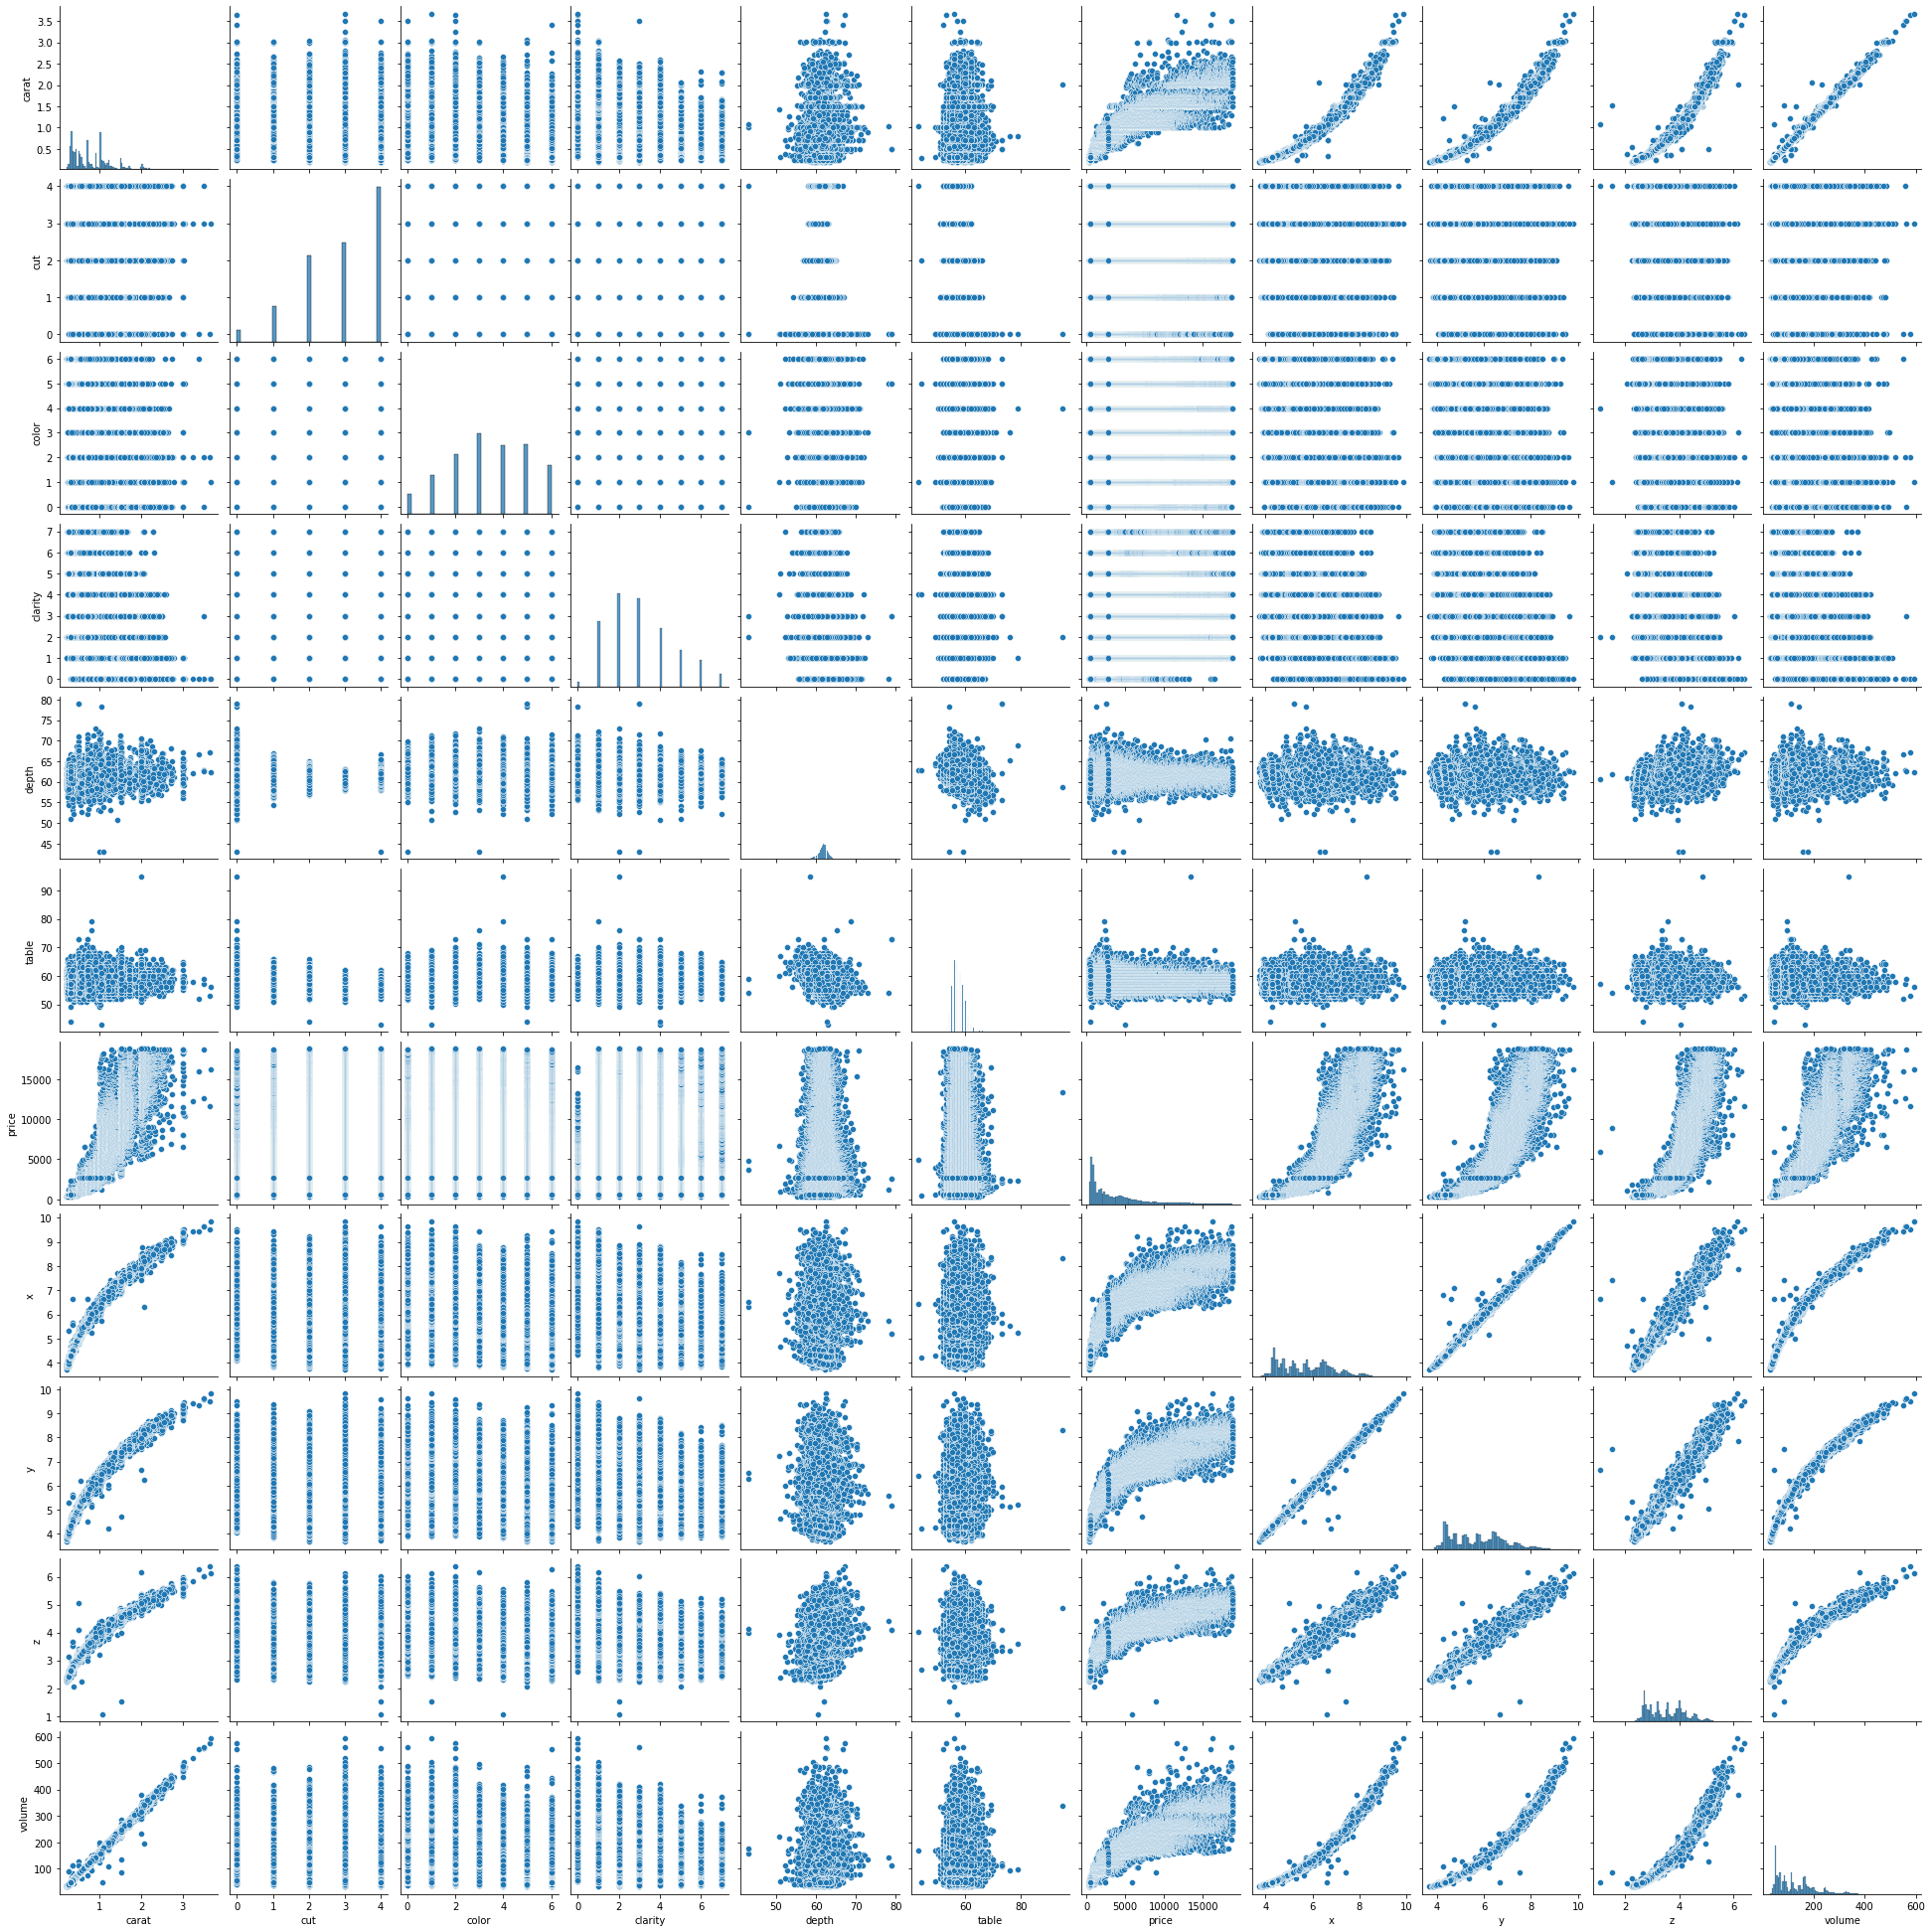

In [210]:
spair = sns.pairplot(data=datatest)
fig = spair.fig
fig.savefig("spair.png")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


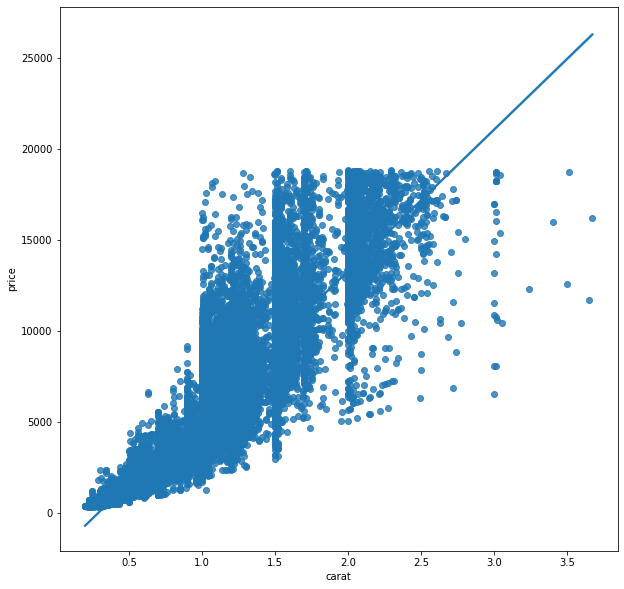

In [211]:
plt.figure(figsize=(10, 10))
sns.regplot((datatest.carat), (datatest.price), scatter=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


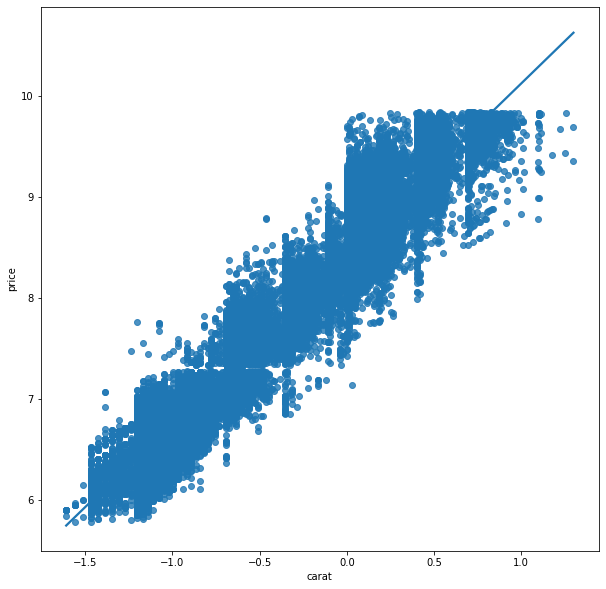

In [212]:
plt.figure(figsize=(10, 10))
sns.regplot(np.log(datatest.carat), np.log(datatest.price), scatter=True)


In [213]:
dados = pd.read_csv('diamante.csv') 
ricks_diamonds = pd.read_csv('asset-v1_IRONHACK+DAPT+202007_SAO+type@asset+block@rick_diamonds.csv')

In [214]:
dados=datatest

In [215]:
dados.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
1,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
2,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63,46.724580
3,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75,51.917250
4,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48,38.693952


In [216]:
def classify_diamond(clarity):
    dict_classify = {'IF' : 8, 'VVS1' : 7, 'VVS2' : 6, 'VS1' : 5, 'VS2': 4, 'SI1':3,  'SI2' : 2, 'I1' : 1}
    return dict_classify[clarity]

ricks_diamonds['clarity'] = ricks_diamonds['clarity'].map(lambda x: classify_diamond(x))


def classify_color(color):
    dict_color = {'D' : 7, 'E' : 6, 'F' : 5, 'G' : 4, 'H': 3, 'I':2,  'J' : 1}
    return dict_color[color]

ricks_diamonds['color'] = ricks_diamonds['color'].map(lambda x: classify_color(x))


# we dont wave null values, all columns are prefectly filled.


def classify_cut(cut):
    dict_color = {'Ideal' : 5, 'Premium' : 4, 'Very Good' : 3, 'Good' : 2, 'Fair': 1}
    return dict_color[cut]

ricks_diamonds['cut'] = ricks_diamonds['cut'].map(lambda x: classify_cut(x))

def volume(x,y,z,depth):
  if(x==0):
    x1 = 6.30	
    y1 = 6.27	
    z1 = 4.03
    volume = (x1*y1*z1)
  elif(z==0):
    x2 = x 
    y2 = y
    z2 = ((depth/100)*((x+y)/2))
    volume = (x2*y2*z2)
  else:
    volume = x*y*z
  
  return volume


def XXX(x,y,z,depth):
  if(x==0):
    x1 = 6.30	
    y1 = 6.27	
    z1 = 4.03
    return x1  
  else:
    return x

def YYY(x,y,z,depth):
  if(y==0):
    x1 = 6.30	
    y1 = 6.27	
    z1 = 4.03
    return y1  
  else:
    return y
   
def ZZZ(x,y,z,depth):
  if(x==0):
    z1 = 4.03
    return z1
  elif(z==0):
    x2 = x 
    y2 = y
    z2 = ((depth/100)*((x+y)/2))
    return z2

  else:
    return z
ricks_diamonds['volume'] = ricks_diamonds[["x", "y","z","depth"]].apply(lambda x : volume(*x), axis=1)


ricks_diamonds['x'] = ricks_diamonds[["x", "y","z","depth"]].apply(lambda x : XXX(*x), axis=1)


ricks_diamonds['y'] = ricks_diamonds[["x", "y","z","depth"]].apply(lambda x : YYY(*x), axis=1)


ricks_diamonds['z'] = ricks_diamonds[["x", "y","z","depth"]].apply(lambda x : ZZZ(*x), axis=1)


dados['cut'] = dados['cut']+1
dados['color'] = dados['color']+1
dados['clarity'] = dados['clarity']+1 

In [217]:

y_model = np.log(dados['price'])


X_model = dados.drop(['price'], axis=1)
X_model['carat'] = X_model['carat'].map(lambda x: np.log(x))
X_model['cut'] = X_model['cut'].map(lambda x: np.log(x))
X_model['color'] = X_model['color'].map(lambda x: np.log(x))
X_model['clarity'] = X_model['clarity'].map(lambda x: np.log(x))
X_model['table'] = X_model['table'].map(lambda x: np.log(x))

X_model.head()


,carat,cut,color,clarity,depth,table,x,y,z,volume
0,-1.560648,1.386294,1.791759,1.098612,59.8,4.110874,3.89,3.84,2.31,34.505856
1,-1.469676,0.693147,1.791759,1.609438,56.9,4.174387,4.05,4.07,2.31,38.076885
2,-1.237874,1.386294,0.693147,1.386294,62.4,4.060443,4.20,4.23,2.63,46.724580
3,-1.171183,0.693147,0.000000,0.693147,63.3,4.060443,4.34,4.35,2.75,51.917250
4,-1.427116,1.098612,0.000000,1.791759,62.8,4.043051,3.94,3.96,2.48,38.693952


In [218]:
X_model.head()

,carat,cut,color,clarity,depth,table,x,y,z,volume
0,-1.560648,1.386294,1.791759,1.098612,59.8,4.110874,3.89,3.84,2.31,34.505856
1,-1.469676,0.693147,1.791759,1.609438,56.9,4.174387,4.05,4.07,2.31,38.076885
2,-1.237874,1.386294,0.693147,1.386294,62.4,4.060443,4.20,4.23,2.63,46.724580
3,-1.171183,0.693147,0.000000,0.693147,63.3,4.060443,4.34,4.35,2.75,51.917250
4,-1.427116,1.098612,0.000000,1.791759,62.8,4.043051,3.94,3.96,2.48,38.693952


In [219]:
ricks_diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,volume
0,0.91,3,3,2,63.4,57.0,6.10,6.18,3.89,146.645220
1,0.38,2,5,4,60.3,61.0,4.68,4.71,2.83,62.381124
2,0.52,5,3,4,61.8,56.0,5.19,5.16,3.20,85.697280
3,1.10,5,4,5,61.3,56.0,6.65,6.69,4.09,181.957965
4,2.28,5,4,2,61.6,57.0,8.44,8.37,5.18,365.929704


In [220]:
model = LinearRegression()
model.fit(X_model,y_model)


LinearRegression()

In [221]:
rick_X = ricks_diamonds[['carat',	'cut',	'color',	'clarity',	'depth',	'table',	'x',	'y',	'z',	'volume'	]]
rick_X['carat'] = rick_X['carat'].map(lambda x: np.log(x))
rick_X['cut'] = rick_X['cut'].map(lambda x: np.log(x))
rick_X['color'] = rick_X['color'].map(lambda x: np.log(x))
rick_X['clarity'] = rick_X['clarity'].map(lambda x: np.log(x))
rick_X['table'] = rick_X['table'].map(lambda x: np.log(x))

ricks_diamonds['price_predicted'] = model.predict((rick_X))
ricks_diamonds['price_predicted'] = np.exp(ricks_diamonds['price_predicted'])
ricks_diamonds.to_csv('teste11.csv')